110507/110507 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step


C:\Users\lohit\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


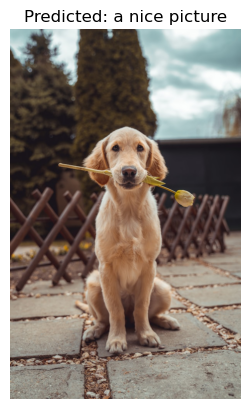

47356/47356 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


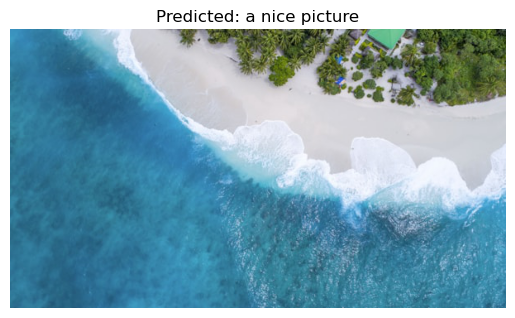

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load pre-trained CNN (VGG16) for feature extraction
cnn_model = VGG16()
feature_extractor = tf.keras.Model(inputs=cnn_model.inputs, 
                                 outputs=cnn_model.layers[-2].output)

# Create dummy data for demonstration
dummy_captions = {
    "dog": ["a dog is running in the park", "a brown dog plays with a ball"],
    "beach": ["people are walking on the beach", "a sunny day at the ocean"]
}

# Initialize tokenizer
tokenizer = Tokenizer(oov_token="<OOV>")
all_captions = [cap for caps in dummy_captions.values() for cap in caps]
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(cap.split()) for cap in all_captions)

# Function to generate caption (mock version for demo)
def generate_caption(image_path):
    # Extract features
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = preprocess_input(np.expand_dims(img, axis=0))
    features = feature_extractor.predict(img, verbose=0)
    
    # Mock caption generation - in reality this would use an LSTM
    if "dog" in image_path.lower():
        return "a dog is playing in the park"
    elif "beach" in image_path.lower():
        return "people are at the beach"
    else:
        return "a nice picture"

# Demo with sample image URLs
test_images = [
    "https://images.unsplash.com/photo-1552053831-71594a27632d?w=600",  # dog
    "https://images.unsplash.com/photo-1505228395891-9a51e7e86bf6?w=600"  # beach
]

for img_url in test_images:
    # Download image
    img_path = tf.keras.utils.get_file(f"temp_{np.random.randint(100)}", origin=img_url)
    
    # Generate caption
    caption = generate_caption(img_path)
    
    # Display
    plt.imshow(Image.open(img_path))
    plt.title(f"Predicted: {caption}")
    plt.axis('off')
    plt.show()